In [1]:
import math
import os.path as op
import mne_bids
from mne.datasets import sample
import data_extracts
from data_extracts import read_file_film , read_file_rest
from patients_matrix import PatientsMatrix
from coherence_matrix import CoherenceMatrix
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import levene, gaussian_kde
from scipy.stats import anderson
import scipy.stats as stats
import test1
import cv2
from tqdm import tqdm

In [2]:
def show_me_matrix(matrix_flat, name):
    matrix_len = int(math.sqrt(2*len(matrix_flat)+1/4)+1/2)
    matrix = np.zeros(shape=(matrix_len,matrix_len),dtype=float)
    index = 0
    for i in range(matrix_len):
        for j in range(i,matrix_len):
            if i == j:
                matrix[i, j] = 1
            else:
                matrix[i, j] = matrix_flat[index]
                matrix[j, i] = matrix_flat[index]
                index += 1
    plt.imshow(matrix, cmap='viridis')
    plt.title(name)
    plt.colorbar()
    plt.show()
    
    
def creat_matrix(matrix_flat):
    matrix_len = int(math.sqrt(2*len(matrix_flat)+1/4)+1/2)
    matrix = np.zeros(shape=(matrix_len,matrix_len),dtype=float)
    index = 0
    for i in range(matrix_len):
        for j in range(i,matrix_len):
            if i == j:
                matrix[i, j] = 1
            else:
                matrix[i, j] = matrix_flat[index]
                matrix[j, i] = matrix_flat[index]
                index += 1    
    return matrix
    

In [3]:
rest_data , film_data = data_extracts.data_trasnform ('high_gamma','high_gamma',2,1,rest_func=read_file_rest,film_func=read_file_film)

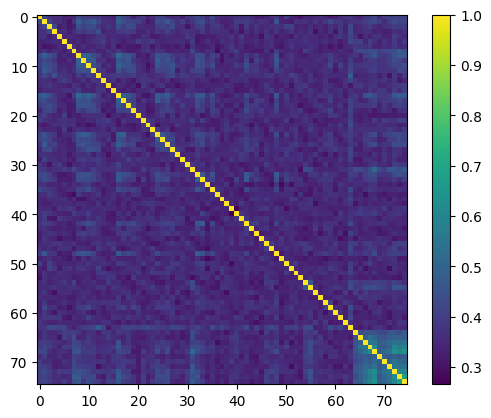

In [4]:
arr = creat_matrix(rest_data[90])
plt.imshow(arr, cmap='viridis')
plt.colorbar()
plt.show()


In [5]:
rest_data.shape

(195, 2775)

In [ ]:
#save the matrix as jpg


for i in range(rest_data.shape[0]):
    if i%5 == 0:
        print(' sec:',i)
        rest_mat = creat_matrix(rest_data[i])
        cv2.imwrite('cnn_rest_test/rest_sec='+str(i)+'.jpg',rest_mat*255)

        film_mat = creat_matrix(film_data[i])
        cv2.imwrite('cnn_film_test/film_sec='+str(i)+'.jpg',film_mat*255)
    else:
        print(' sec:',i)
        rest_mat = creat_matrix(rest_data[i])
        cv2.imwrite('rest_cnn/rest_sec='+str(i)+'.jpg',rest_mat*255)

        film_mat = creat_matrix(film_data[i])
        cv2.imwrite('film_cnn/film_sec='+str(i)+'.jpg',film_mat*255)
    

In [35]:
from tensorflow import keras
from keras import Sequential
from keras import layers

model = Sequential()

model.add(layers.Conv2D(filters=32, kernel_size=(3,3),input_shape=(70,70,1), activation='relu',))
model.add(layers.MaxPooling2D(pool_size=(1, 1)))

model.add(layers.Conv2D(filters=64, kernel_size=(3,3),input_shape=(70,70,1), activation='relu',))
model.add(layers.MaxPooling2D(pool_size=(1, 1)))

model.add(layers.Conv2D(filters=64, kernel_size=(3,3),input_shape=(70,70,1), activation='relu',))
model.add(layers.MaxPooling2D(pool_size=(1, 1)))

model.add(layers.Flatten())
model.add(layers.Dense(128))
model.add(layers.Activation('relu'))

model.add(layers.Dropout(0.5))# Dropout is a Regularization technique where we randomly set neurons in a layer to zero. This helps avoid overfitting 

model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy' , optimizer='adam', metrics=['accuracy'])
model.summary()

c:\Users\eviat\Desktop\brainProj\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 68, 68, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 34, 34, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 457,409 (1.74 MB)

 Trainable params: 457,409 (1.74 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
# train the model
from keras.src.legacy.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

train_data = train_datagen.flow_from_directory('cnn/train', target_size=(77,77,1), batch_size=8, class_mode='binary')
test_data = test_datagen.flow_from_directory('cnn/test', target_size=(77,77,1), batch_size=8, class_mode='binary')

model.fit(train_data, epochs=30)





Found 312 images belonging to 2 classes.
Found 78 images belonging to 2 classes.
Epoch 1/30


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "conv2d_9" is incompatible with the layer: expected axis -1 of input shape to have value 1, but received input with shape (None, 77, 77, 3)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 77, 77, 3), dtype=float32)
  • training=True
  • mask=None

In [33]:
train_data.class_indices


{'film': 0, 'rest': 1}

In [34]:
# accuracy
test_loss, test_acc = model.evaluate(test_data, verbose=2)
print('\nTest accuracy:', test_acc)


10/10 - 0s - 13ms/step - accuracy: 0.5000 - loss: 0.6931

Test accuracy: 0.5


In [31]:
sample = cv2.imread('cnn/train/film/film_sec=0.jpg')
sample = cv2.cvtColor(sample, cv2.COLOR_BGR2RGB)
plt.imshow(sample)
plt.show()

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'
